# Marketing Analytics Project

> ### Technical Skills for this Project:  Python(Pandas, Seaborn), Tableau, EDA, Statistics.

Task Details:
been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. 

I need to analyze the data set to understand this problem and propose data-driven solutions.

## Table of contents
1. [Pre processing](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Statistical Analysis](#paragraph2)
4. [Data Visualization](#paragraph3)

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime, date

In [2]:
# First view to the dataset
og = pd.read_csv('marketing_data.csv', parse_dates=True)
pd.set_option("display.max_columns", None)
og

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [3]:
og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

##### Observations: 
- ID : isnt in the id column .
- With 'Year of Birth' i can create a column 'Age'.
- 'Income' is dtype object, Has a space in the name, has null values.
- Whit 'kihome'&'Teenhome' i can create another column 'Children'.
- Parse the dates
- I can create a Column 'total amount products'
- I can create a Column 'total number purchases'
- With the acceptance i can see the 'Marketing Responsivness'

## Section 01: Pre Processing <a name="introduction"></a>

1. drop Useless Columns
2. create usefull columns
3. Parse dates
4. convert data dtypes
5. handle duplicates

In [4]:
#Set the id column
og = og.set_index('ID')

In [5]:
#Parse the dates
og['Dt_Customer'] = pd.to_datetime(og['Dt_Customer'])

In [6]:
#create Column 'Age'
today = date.today()
og['Age'] = today.year - og['Year_Birth']

In [7]:
og['Year_Birth'] = pd.to_datetime(og['Year_Birth'], format='%Y')

In [8]:
#fixing 'Income' Column
og[' Income '] = og[' Income '].str.replace('$', '')

In [9]:
og[' Income '] = og[' Income '].str.replace(' ', '')

In [10]:
og['Income'], og['zero'] = og[' Income '].str.split('.',expand=True)

In [11]:
og['Income'] = og[' Income '].str.split('.',expand=True)

In [12]:
og

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Income,zero
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970-01-01,Graduation,Divorced,"84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,"84,835",1
1,1961-01-01,Graduation,Single,"57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,"57,091",1
10476,1958-01-01,Graduation,Married,"67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,"67,267",1
1386,1967-01-01,Graduation,Together,"32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,"32,474",1
5371,1989-01-01,Graduation,Single,"21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,"21,474",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976-01-01,PhD,Divorced,"66,476.00",0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,45,"66,476",1
5263,1977-01-01,2n Cycle,Married,"31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,44,"31,056",1
22,1976-01-01,Graduation,Divorced,"46,310.00",1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,45,"46,310",1


In [13]:
#Coverting Dtypes
og['Education'] = og['Education'].astype('category')
og['Marital_Status'] = og['Marital_Status'].astype('category')
og['Country'] = og['Country'].astype('category')

In [14]:
#Cheking duplicates
og.duplicated().any()

True

In [15]:
#Cheking null values
og.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Age                     0
Income                 24
zero                    0
dtype: int64

In [16]:
og[' Income '] = og[' Income '].fillna(0)

In [17]:
og['Income'] = og['Income'].str.replace(',', '')

In [18]:
og['Income'] = og['Income'].fillna(0)

In [19]:
og['Income'] = og['Income'].astype(float).astype(int)

In [20]:
og.drop([' Income ', 'zero'], axis=1, inplace=True)

In [21]:
#Making the new columns
og['TotalMntProds'] = og['MntWines']+og['MntFruits']+og['MntMeatProducts']+og['MntFishProducts']+og['MntSweetProducts']+og['MntGoldProds']
og['TotalNumPurchases'] = og['NumDealsPurchases']+og['NumWebPurchases']+og['NumCatalogPurchases']+og['NumStorePurchases']
og['Responsiveness'] = og['AcceptedCmp1']+og['AcceptedCmp2']+og['AcceptedCmp3']+og['AcceptedCmp4']+og['AcceptedCmp5']+og['Response']
og['Children'] = og['Kidhome']+og['Teenhome']

In [22]:
#Reorganize the columsn for better readability
og = og[['Education','Marital_Status','Income','Age','Country','Kidhome','Teenhome','Children','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','TotalMntProds' , 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','TotalNumPurchases' ,'NumWebVisitsMonth','Responsiveness' ,'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']]

In [23]:
og

,Education,Marital_Status,Income,Age,Country,Kidhome,Teenhome,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases,NumWebVisitsMonth,Responsiveness,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,Graduation,Divorced,84835,51,SP,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,1,0,0,0,0,0,1,0
1,Graduation,Single,57091,60,CA,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,2,0,1,0,0,0,1,0
10476,Graduation,Married,67267,63,US,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0
1386,Graduation,Together,32474,54,AUS,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0
5371,Graduation,Single,21474,32,SP,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,2,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,PhD,Divorced,66476,45,US,0,1,1,2013-03-07,99,372,18,126,47,48,78,689,2,5,2,11,20,4,0,0,0,0,0,0,0,0
5263,2n Cycle,Married,31056,44,SP,1,0,1,2013-01-22,99,5,10,13,3,8,16,55,1,1,0,3,5,8,0,0,0,0,0,0,0,0
22,Graduation,Divorced,46310,45,SP,1,0,1,2012-12-03,99,185,2,88,15,5,14,309,2,6,1,5,14,8,0,0,0,0,0,0,0,0


## Section 2: Exploratory Data Analysis <a name="paragraph1"></a>

In [24]:
import seaborn as sns
from scipy import stats

In [25]:
#Basic Statistics
og.describe()

,Income,Age,Kidhome,Teenhome,Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases,NumWebVisitsMonth,Responsiveness,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51687.459375,52.194196,0.444196,0.506250,0.950446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214,2.325000,4.084821,2.662054,5.790179,14.862054,5.316518,0.446875,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,0.009375
std,25609.342730,11.984069,0.538398,0.544538,0.751803,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288,1.932238,2.778714,2.923101,3.250958,7.677173,2.426645,0.890543,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.096391
min,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34722.000000,44.000000,0.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000,1.000000,2.000000,0.000000,3.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51075.000000,51.000000,0.000000,0.000000,1.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,2.000000,4.000000,2.000000,5.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68289.750000,62.000000,1.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000,3.000000,6.000000,4.000000,8.000000,21.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,666666.000000,128.000000,2.000000,2.000000,3.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,44.000000,20.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obsevations: 
- seeing the max an the min i can think that some columns may have outliers

<AxesSubplot:xlabel='Income'>

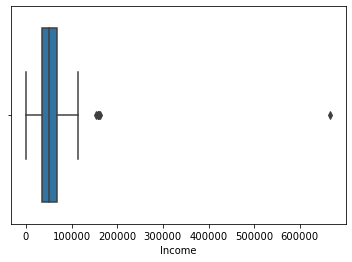

In [26]:
sns.boxplot(x=og['Income'])

<AxesSubplot:xlabel='Age'>

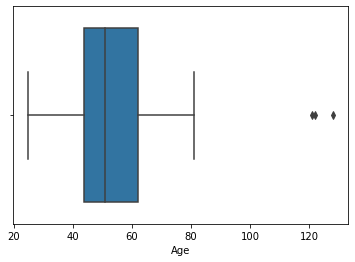

In [27]:
sns.boxplot(x=og['Age'])

Observations: 
- Outliers can be found in many columns, probably due to individual buying behaviour
- Age have outliers that canot be right

In [28]:
og.columns

Index(['Education', 'Marital_Status', 'Income', 'Age', 'Country', 'Kidhome',
       'Teenhome', 'Children', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'TotalMntProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'TotalNumPurchases',
       'NumWebVisitsMonth', 'Responsiveness', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

In [29]:
norm = og[['Age']]

In [30]:
# normalize the 'Age column'
norm = norm[(np.abs(stats.zscore(norm)) < 3).all(axis=1)]

In [31]:
og[['Age']] = norm

C:\Users\steve\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
og.fillna(og.median())

<ipython-input-32-1c6da9d0c773>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  og.fillna(og.median())


,Education,Marital_Status,Income,Age,Country,Kidhome,Teenhome,Children,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases,NumWebVisitsMonth,Responsiveness,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,Graduation,Divorced,84835,51.0,SP,0,0,0,2014-06-16,0,189,104,379,111,189,218,1190,1,4,4,6,15,1,1,0,0,0,0,0,1,0
1,Graduation,Single,57091,60.0,CA,0,0,0,2014-06-15,0,464,5,64,7,0,37,577,1,7,3,7,18,5,2,0,1,0,0,0,1,0
10476,Graduation,Married,67267,63.0,US,0,1,1,2014-05-13,0,134,11,59,15,2,30,251,1,3,2,5,11,2,0,0,0,0,0,0,0,0
1386,Graduation,Together,32474,54.0,AUS,1,1,2,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,4,7,0,0,0,0,0,0,0,0
5371,Graduation,Single,21474,32.0,SP,1,0,1,2014-04-08,0,6,16,24,11,0,34,91,2,3,1,2,8,7,2,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,PhD,Divorced,66476,45.0,US,0,1,1,2013-03-07,99,372,18,126,47,48,78,689,2,5,2,11,20,4,0,0,0,0,0,0,0,0
5263,2n Cycle,Married,31056,44.0,SP,1,0,1,2013-01-22,99,5,10,13,3,8,16,55,1,1,0,3,5,8,0,0,0,0,0,0,0,0
22,Graduation,Divorced,46310,45.0,SP,1,0,1,2012-12-03,99,185,2,88,15,5,14,309,2,6,1,5,14,8,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Age'>

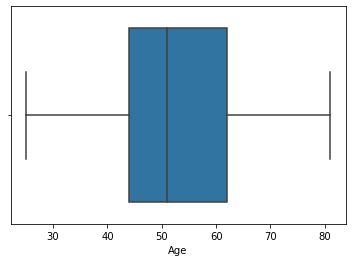

In [33]:
#normalized
sns.boxplot(x=og['Age'])

In [34]:
#Cheking Correlation between variables
correlation = og.corr(method='pearson')

In [35]:
import matplotlib.pyplot as plt
correlation2 = og.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [36]:
correlation[['Income', 'Age']]

,Income,Age
Income,1.000000,0.156067
Age,0.156067,1.000000
Kidhome,-0.424723,-0.234133
Teenhome,0.015498,0.363350
Children,-0.292937,0.095481
Recency,-0.010603,0.019670
MntWines,0.570851,0.163035
MntFruits,0.421910,0.013751
MntMeatProducts,0.565318,0.030927
MntFishProducts,0.431879,0.042519


<AxesSubplot:xlabel='Education', ylabel='Income'>

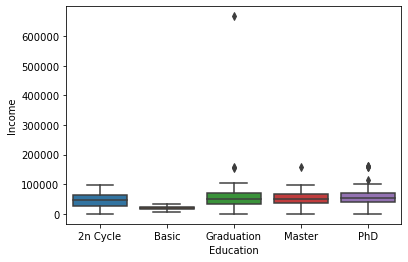

In [37]:
#relation between income and education
sns.boxplot(x='Education', y='Income', data=og)

<AxesSubplot:xlabel='Children', ylabel='Income'>

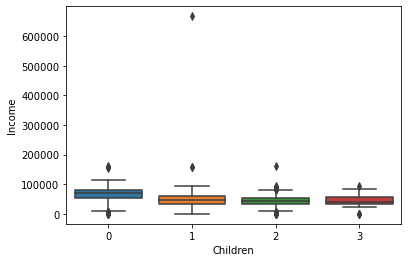

In [38]:
#relation betweent income and children
sns.boxplot(x='Children', y='Income', data=og)

Observation:
- No strong correlation of "Age" with other feature
- Income is strongly positively correlated with: 
    - total amount spent
    - number of purchases
    - amount spent for wines
    - amount spent for meat
    - number of catalog purchases
    - number of store purchases
    - higher education
- Income is negatively correlated with:
    - monthtly website visits
    - Children 

In [39]:
correlation['Children']

Income                -0.292937
Age                    0.095481
Kidhome                0.689971
Teenhome               0.698433
Children               1.000000
Recency                0.018053
MntWines              -0.351909
MntFruits             -0.394853
MntMeatProducts       -0.502208
MntFishProducts       -0.425503
MntSweetProducts      -0.383137
MntGoldProds          -0.266095
TotalMntProds         -0.498888
NumDealsPurchases      0.439684
NumWebPurchases       -0.146361
NumCatalogPurchases   -0.439904
NumStorePurchases     -0.321125
TotalNumPurchases     -0.245790
NumWebVisitsMonth      0.418419
Responsiveness        -0.253760
AcceptedCmp1          -0.224887
AcceptedCmp2          -0.069823
AcceptedCmp3          -0.020402
AcceptedCmp4          -0.087563
AcceptedCmp5          -0.285642
Response              -0.169163
Complain               0.031066
Name: Children, dtype: float64

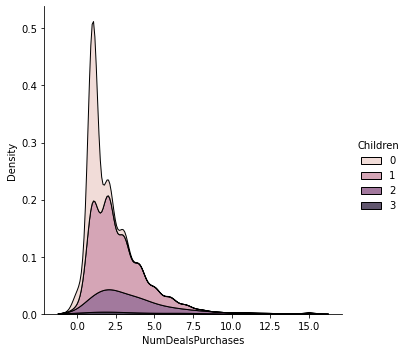

In [40]:
#sns.barplot(x="Children", y="TotalNumPurchases",hue='Children' data=og)
#sns.catplot(y="TotalNumPurchases", hue="Children", kind="count",data=og)
#sns.displot(og, x="TotalNumPurchases", hue="Children",multiple="dodge")
sns.displot(og, x="NumDealsPurchases", hue="Children", kind="kde", multiple="stack", fill=True)

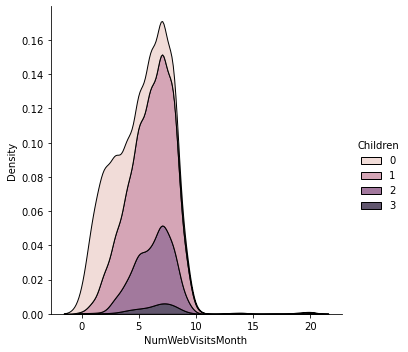

In [41]:
sns.displot(og, x="NumWebVisitsMonth", hue="Children", kind="kde", multiple="stack", fill=True)

Observation:
- Children is positively correlated with:
    - NumDealsPurchases
    - NumWebVisitsMonth
- Children is negatively correlated with:
    - total amount spent
    - amount spent on fish
    - amount spent on meat
    - amount spent on sweets
    - amount spent on fruits
    - number of catalog purchases
    - number of store purchases
    - Income
- despite the positive ratio of web visits per month, it has a low ratio of web purchases.

In [42]:
og.columns

Index(['Education', 'Marital_Status', 'Income', 'Age', 'Country', 'Kidhome',
       'Teenhome', 'Children', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'TotalMntProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'TotalNumPurchases',
       'NumWebVisitsMonth', 'Responsiveness', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

In [43]:
correlation2

,Income,Age,Kidhome,Teenhome,Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalNumPurchases,NumWebVisitsMonth,Responsiveness,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
Income,1.0,0.16,-0.42,0.015,-0.29,-0.011,0.57,0.42,0.57,0.43,0.42,0.31,0.65,-0.082,0.37,0.58,0.52,0.56,-0.54,0.28,0.27,0.088,-0.0097,0.17,0.33,0.14,-0.024
Age,0.16,1.0,-0.23,0.36,0.095,0.02,0.16,0.014,0.031,0.043,0.02,0.058,0.11,0.068,0.15,0.13,0.14,0.18,-0.12,-0.0074,0.0082,0.0077,-0.061,0.064,-0.015,-0.018,0.0045
Kidhome,-0.42,-0.23,1.0,-0.036,0.69,0.0088,-0.5,-0.37,-0.44,-0.39,-0.37,-0.35,-0.56,0.22,-0.36,-0.5,-0.5,-0.48,0.45,-0.19,-0.17,-0.082,0.015,-0.16,-0.21,-0.08,0.04
Teenhome,0.015,0.36,-0.036,1.0,0.7,0.016,0.0048,-0.18,-0.26,-0.2,-0.16,-0.022,-0.14,0.39,0.16,-0.11,0.051,0.13,0.13,-0.16,-0.14,-0.016,-0.043,0.039,-0.19,-0.15,0.0031
Children,-0.29,0.095,0.69,0.7,1.0,0.018,-0.35,-0.39,-0.5,-0.43,-0.38,-0.27,-0.5,0.44,-0.15,-0.44,-0.32,-0.25,0.42,-0.25,-0.22,-0.07,-0.02,-0.088,-0.29,-0.17,0.031
Recency,-0.011,0.02,0.0088,0.016,0.018,1.0,0.016,-0.0043,0.023,0.0011,0.023,0.017,0.02,-0.0011,-0.011,0.025,0.0008,0.0057,-0.021,-0.089,-0.019,-0.0018,-0.033,0.019,0.00013,-0.2,0.013
MntWines,0.57,0.16,-0.5,0.0048,-0.35,0.016,1.0,0.39,0.56,0.4,0.39,0.39,0.89,0.011,0.54,0.64,0.64,0.71,-0.32,0.49,0.35,0.21,0.062,0.37,0.47,0.25,-0.039
MntFruits,0.42,0.014,-0.37,-0.18,-0.39,-0.0043,0.39,1.0,0.54,0.59,0.57,0.39,0.61,-0.13,0.3,0.49,0.46,0.46,-0.42,0.17,0.19,-0.0098,0.015,0.01,0.22,0.13,-0.0052
MntMeatProducts,0.57,0.031,-0.44,-0.26,-0.5,0.023,0.56,0.54,1.0,0.57,0.52,0.35,0.84,-0.12,0.29,0.72,0.48,0.55,-0.54,0.33,0.31,0.043,0.018,0.1,0.37,0.24,-0.023
MntFishProducts,0.43,0.043,-0.39,-0.2,-0.43,0.0011,0.4,0.59,0.57,1.0,0.58,0.42,0.64,-0.14,0.29,0.53,0.46,0.47,-0.45,0.18,0.26,0.0026,0.00036,0.017,0.2,0.11,-0.021


In [44]:
#let's take a look at the correlation and performance of the website
correlation[['NumWebPurchases']]

,NumWebPurchases
Income,0.372397
Age,0.153973
Kidhome,-0.361647
Teenhome,0.155500
Children,-0.146361
Recency,-0.010726
MntWines,0.542265
MntFruits,0.296735
MntMeatProducts,0.293761
MntFishProducts,0.293681


<AxesSubplot:xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

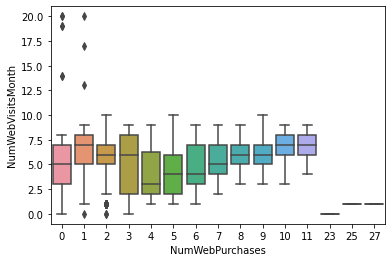

In [45]:
sns.boxplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=og)

Observation:

- NumWebPurchases is positively correlated with:
    - MntWines
    - MntGoldProds
    - NumStorePurchases
- NumWebPurchases is negatively correlated with:
    - Recency
    - Children
- we see a negative correlation between website sales and website visits. 

In [46]:
correlation[['Responsiveness']]

,Responsiveness
Income,0.284451
Age,-0.007393
Kidhome,-0.193419
Teenhome,-0.159110
Children,-0.253760
Recency,-0.088962
MntWines,0.489211
MntFruits,0.172769
MntMeatProducts,0.330172
MntFishProducts,0.180003


<AxesSubplot:xlabel='Responsiveness', ylabel='TotalNumPurchases'>

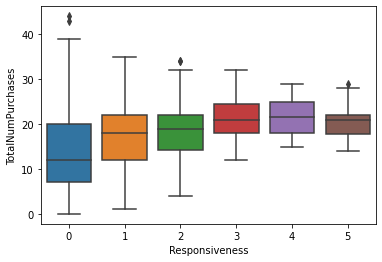

In [47]:
sns.boxplot(x='Responsiveness', y='TotalNumPurchases', data=og)

<AxesSubplot:xlabel='Responsiveness', ylabel='NumWebVisitsMonth'>

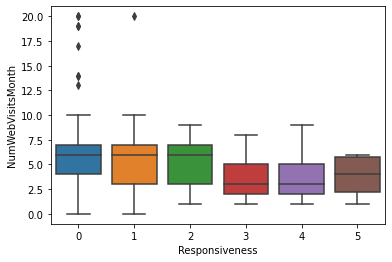

In [54]:
sns.boxplot(x='Responsiveness', y='NumWebVisitsMonth', data=og)

<AxesSubplot:xlabel='Responsiveness', ylabel='NumWebPurchases'>

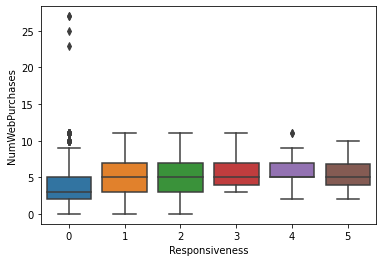

In [62]:
sns.boxplot(x='Responsiveness', y='NumWebPurchases', data=og)

<AxesSubplot:xlabel='Responsiveness', ylabel='TotalMntProds'>

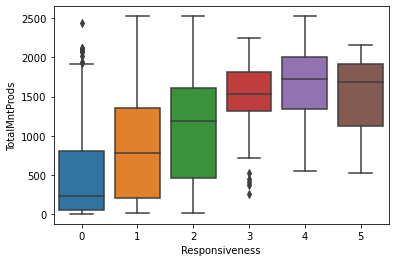

In [57]:
sns.boxplot(x='Responsiveness', y='TotalMntProds', data=og)

<AxesSubplot:xlabel='Responsiveness', ylabel='Recency'>

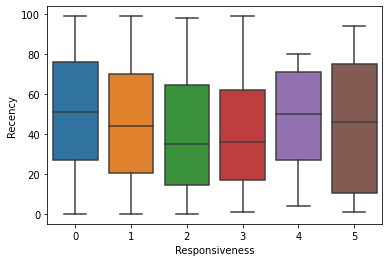

In [58]:
sns.boxplot(x='Responsiveness', y='Recency', data=og)

<AxesSubplot:xlabel='Complain', ylabel='TotalNumPurchases'>

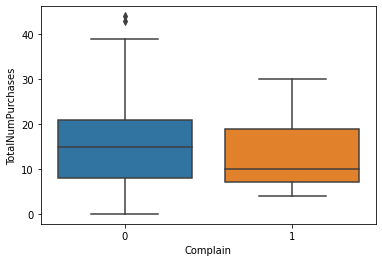

In [61]:
sns.boxplot(x='Complain', y='TotalNumPurchases', data=og)

Observation:

- Responsiveness is positively correlated with:
    - MntWines
- Responsiveness is negatively correlated with:
    - Recency
    - Children
    - Age
    - NumDealsPurchases
    - NumWebVisitsMonth
- those of campaign 3 and 4 are the ones with the best total of purchases
- Campaigns 1 and 2 are the ones that have more visits to the website and are also the ones that make more purchases on the web.
- campaign 4 has the highest amount spent on products in general
- campaign 2 and 3 are the ones with the shortest time since last purchase 
- people who complain have the lowest total amount of purchases. 

In [66]:
og['Complain'].sum()

21

## Statistical Analysis <a name="paragraph2"></a>

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent *an above average amount* on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? *(Hint: use your knowledge of interaction variables/effects)*
- Is there a significant relationship between geographical regional and success of a campaign?

In [70]:
og.columns

Index(['Education', 'Marital_Status', 'Income', 'Age', 'Country', 'Kidhome',
       'Teenhome', 'Children', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'TotalMntProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'TotalNumPurchases',
       'NumWebVisitsMonth', 'Responsiveness', 'AcceptedCmp1', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'],
      dtype='object')

What factors are significantly related to the number of store purchases?

In [72]:
correlation['NumStorePurchases']

Income                 0.521456
Age                    0.139465
Kidhome               -0.499683
Teenhome               0.050695
Children              -0.321125
Recency                0.000799
MntWines               0.642100
MntFruits              0.461758
MntMeatProducts        0.479659
MntFishProducts        0.459855
MntSweetProducts       0.448756
MntGoldProds           0.381678
TotalMntProds          0.674669
NumDealsPurchases      0.068879
NumWebPurchases        0.502713
NumCatalogPurchases    0.518738
NumStorePurchases      1.000000
TotalNumPurchases      0.820259
NumWebVisitsMonth     -0.428473
Responsiveness         0.173095
AcceptedCmp1           0.183249
AcceptedCmp2           0.085189
AcceptedCmp3          -0.067577
AcceptedCmp4           0.179379
AcceptedCmp5           0.214790
Response               0.039363
Complain              -0.016524
Name: NumStorePurchases, dtype: float64

- positive significant relation with: Income, mntWines, NumWebPurchases, NumCatalogPurchases.
- Negative significant relation with: Children.

Does US fare significantly better than the Rest of the World in terms of total purchases?

Country
AUS     2314
CA      4101
GER     1788
IND     2099
ME        59
SA      5117
SP     16052
US      1761
Name: TotalNumPurchases, dtype: int64

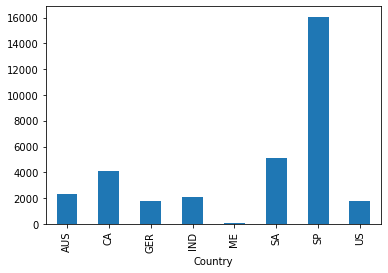

In [82]:
og.groupby('Country')['TotalNumPurchases'].sum().plot(kind='bar')
og.groupby('Country')['TotalNumPurchases'].sum()

- Spain have the best Fare followed by south Africa and Canada
- where usa, Mexico and Germany have the lowest fare 

Your supervisor insists that people who buy gold are more conservative. 
Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. 

In [119]:
correlation['NumStorePurchases']

Income                 0.521456
Age                    0.139465
Kidhome               -0.499683
Teenhome               0.050695
Children              -0.321125
Recency                0.000799
MntWines               0.642100
MntFruits              0.461758
MntMeatProducts        0.479659
MntFishProducts        0.459855
MntSweetProducts       0.448756
MntGoldProds           0.381678
TotalMntProds          0.674669
NumDealsPurchases      0.068879
NumWebPurchases        0.502713
NumCatalogPurchases    0.518738
NumStorePurchases      1.000000
TotalNumPurchases      0.820259
NumWebVisitsMonth     -0.428473
Responsiveness         0.173095
AcceptedCmp1           0.183249
AcceptedCmp2           0.085189
AcceptedCmp3          -0.067577
AcceptedCmp4           0.179379
AcceptedCmp5           0.214790
Response               0.039363
Complain              -0.016524
Name: NumStorePurchases, dtype: float64

In [133]:
from scipy import stats
a = og['MntGoldProds']
b = og['NumStorePurchases']
print(stats.pearsonr(a, b))
print(stats.kendalltau(a,b))
print(stats.spearmanr(a,b))

(0.38167801381749733, 1.3447256974369095e-78)
KendalltauResult(correlation=0.39229092816306144, pvalue=4.752746314649227e-152)
SpearmanrResult(correlation=0.5398635641035611, pvalue=1.1401704011707027e-169)


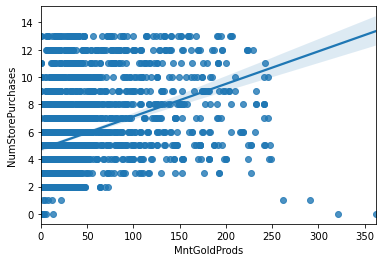

In [117]:
#sns.relplot(x="MntGoldProds", y="NumStorePurchases",data=og)
sns.regplot(x="MntGoldProds", y="NumStorePurchases", data=og);

- yes, there is a positive correlation between the amount spent on gold and store purchases, however this does not prove that they are more conservative.

Fish has Omega 3 fatty acids which are good for the brain. 

Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

What other factors are significantly related to amount spent on fish?

In [150]:
# I will create dummy variable to check the data in regression
og['Marital_Status'].values

['Divorced', 'Single', 'Married', 'Together', 'Single', ..., 'Divorced', 'Married', 'Divorced', 'Married', 'Married']
Length: 2240
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']

In [151]:
MS = ['Single', 'Together', 'Married', 'Divorced', 'Absurd', 'Alone', 'Widow', 'YOLO']
num = [1,2,3,4,5,6,7,8]
og['dummy'] = og['Marital_Status'].replace(MS, num)

In [178]:
correlation3 = og.corr(method='pearson')
correlation3['MntFishProducts']

Income                 0.431879
Age                    0.042519
Kidhome               -0.387644
Teenhome              -0.204187
Children              -0.425503
Recency                0.001079
MntWines               0.399753
MntFruits              0.594804
MntMeatProducts        0.568402
MntFishProducts        1.000000
MntSweetProducts       0.579870
MntGoldProds           0.422875
TotalMntProds          0.642818
NumDealsPurchases     -0.139361
NumWebPurchases        0.293681
NumCatalogPurchases    0.534478
NumStorePurchases      0.459855
TotalNumPurchases      0.469454
NumWebVisitsMonth     -0.446003
Responsiveness         0.180003
AcceptedCmp1           0.260762
AcceptedCmp2           0.002577
AcceptedCmp3           0.000357
AcceptedCmp4           0.016843
AcceptedCmp5           0.199578
Response               0.111331
Complain              -0.020953
dummy                  0.014451
dummy2                 0.005115
Name: MntFishProducts, dtype: float64

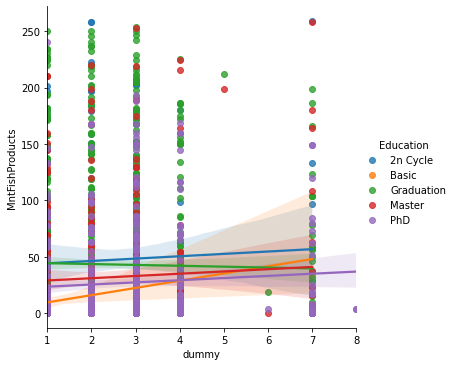

In [165]:
sns.lmplot(x="dummy", y="MntFishProducts", hue="Education", data=og);

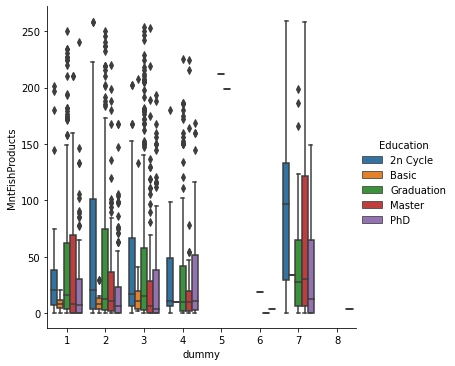

In [161]:
sns.catplot(x="dummy", y="MntFishProducts", hue="Education", kind="box", data=og)

In [168]:
og.groupby('Education')['MntFishProducts'].sum()

Education
2n Cycle       9639
Basic           921
Graduation    48630
Master        11877
PhD           12990
Name: MntFishProducts, dtype: int64

- positive significant relation with: Income, NumStorePurchases, NumCatalogPurchases, MntGoldProds, MntSweetProducts, MntWines, MntFruits, MntMeatProducts, Income.
- Negative significant relation with: NumWebVisitsMonth, NumDealsPurchases, Children.

- married Phd candidates, do not spend more on fish
- Graduation are the ones who spend more on fish.


Is there a significant relationship between geographical regional and success of a campaign?

In [173]:
og['Country'].values

['SP', 'CA', 'US', 'AUS', 'SP', ..., 'US', 'SP', 'SP', 'IND', 'CA']
Length: 2240
Categories (8, object): ['AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US']

In [174]:
CT = ['AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US']
numm = [1,2,3,4,5,6,7,8]
og['dummy2'] = og['Country'].replace(CT, numm)
og['dummy2']

ID
1826     7
1        2
10476    8
1386     1
5371     7
        ..
10142    8
5263     7
22       7
528      4
4070     2
Name: dummy2, Length: 2240, dtype: int64

Country
AUS     160
CA      268
GER     120
IND     148
ME        3
SA      337
SP     1095
US      109
Name: Responsiveness, dtype: int64

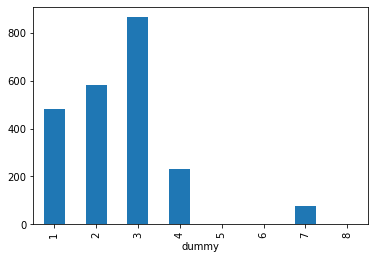

In [177]:
og.groupby('dummy')['Responsiveness'].count().plot(kind='bar');
og.groupby('Country')['Responsiveness'].count()

In [179]:
correlation3['dummy2']

Income                 0.025146
Age                   -0.019666
Kidhome               -0.024503
Teenhome              -0.013569
Children              -0.027376
Recency                0.034230
MntWines               0.015581
MntFruits             -0.003103
MntMeatProducts        0.007837
MntFishProducts        0.005115
MntSweetProducts       0.000062
MntGoldProds          -0.035991
TotalMntProds          0.008791
NumDealsPurchases     -0.002118
NumWebPurchases       -0.012985
NumCatalogPurchases   -0.001571
NumStorePurchases      0.018828
TotalNumPurchases      0.002142
NumWebVisitsMonth      0.017030
Responsiveness         0.020817
AcceptedCmp1           0.023425
AcceptedCmp2          -0.002980
AcceptedCmp3           0.010654
AcceptedCmp4           0.008352
AcceptedCmp5           0.002056
Response               0.021437
Complain               0.026162
dummy                 -0.020153
dummy2                 1.000000
Name: dummy2, dtype: float64

- no regional correlation with campaign

In [184]:
og.to_excel(r'C:\Users\steve\Documents\MAP.xlsx')

# Data Visualization <a name="paragraph3"></a>

- Which marketing campaign is most successful?

- What does the average customer look like for this company?

- Which products are performing best?

- Which channels are underperforming?